In [1]:
import pandas as pan #pour les données :gestion des data.frame
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.mstats as ms

In [2]:
#Exo 1
df=pan.read_csv("https://math.univ-lyon1.fr/~dabrowski/nutriage.csv",sep="\t")
print(df)

    sexe  the  cafe  taille  poids  age  viande  poisson  matgras
0      F    0     0     151     58   72       4        3        6
1      F    1     1     162     60   68       5        2        4
2      F    0     4     162     75   78       3        1        4
3      F    0     0     154     45   91       0        4        2
4      F    2     1     154     50   65       5        3        2
..   ...  ...   ...     ...    ...  ...     ...      ...      ...
221    F    0     1     160     73   74       4        3        6
222    F    0     3     163     62   68       4        3        3
223    H    0     2     170     74   71       4        3        3
224    F    0     2     154     45   77       4        3        5
225    F    2     0     159     63   69       3        3        4

[226 rows x 9 columns]


In [20]:
df['sexe']=df['sexe'].astype('category')
df['sexe']=df['sexe'].cat.rename_categories(["Femme","Homme"])

In [17]:
#Poisson
df['poisson']=df['poisson'].astype('category')
df['poisson'].cat.categories

freq=["jamais","<1/sem.","1/sem.","2-3/sem.","4-6/sem.","1/jour"] #on crée une liste avec les noms de niveaux
df['poisson']=df['poisson'].cat.rename_categories(freq) #on change les noms


In [7]:
#viande
freq_type=pan.CategoricalDtype(categories=freq, ordered=True)
df['viande']=df['viande'].astype('category')  
df['viande'].cat.categories
df['viande'].cat.categories=freq #on change les noms
df['viande']=df['viande'].astype(freq_type)#on passe au type ordonné


In [18]:
df['matgras']=df['matgras'].astype('category')  
ListeMatGras=["beurre","margarine","arachide","tournesol","olive","Melange","colza","canard"]
df['matgras']=df['matgras'].cat.rename_categories(ListeMatGras)

In [22]:
#3

df['taille']=df['taille'].astype('float64')
df['poids']=df['poids'].astype('float64')
df['age']=df['age'].astype('float64')
    
#Verification
df.dtypes


sexe       category
the           int64
cafe          int64
taille      float64
poids       float64
age         float64
viande     category
poisson    category
matgras    category
dtype: object

In [10]:
###################Exercice 2#########################

help(pan.crosstab)


Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins: 'bool' = False, margins_name: 'str' = 'All', dropna: 'bool' = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column 

In [23]:
#1
table=pan.crosstab(df["sexe"],df["matgras"])
print(table)
#47 femmes de l'échantillon utilisaient de l'huile de Tournesol


matgras  beurre  margarine  arachide  tournesol  olive  Melange  colza  canard
sexe                                                                          
Femme         5         17        32         47     20       18      1       1
Homme        10         10        16         21     20        5      0       3


In [24]:
#2
tableFreq=pan.crosstab(df["sexe"],df["matgras"], normalize=True,margins=True)
print(tableFreq)
tableFreq.iloc[2,0:8]
tableFreq.iloc[2,3]#le tournesol est consommé par 30.09% des personnes intérrogées


matgras    beurre  margarine  arachide  tournesol     olive   Melange  \
sexe                                                                    
Femme    0.022124   0.075221  0.141593   0.207965  0.088496  0.079646   
Homme    0.044248   0.044248  0.070796   0.092920  0.088496  0.022124   
All      0.066372   0.119469  0.212389   0.300885  0.176991  0.101770   

matgras     colza    canard       All  
sexe                                   
Femme    0.004425  0.004425  0.623894  
Homme    0.000000  0.013274  0.376106  
All      0.004425  0.017699  1.000000  


0.3008849557522124

In [26]:
###Autre solution 2
tableMG=df["matgras"].value_counts(sort=False)/226
print(tableMG)
tableMG["tournesol"]

beurre       0.066372
margarine    0.119469
arachide     0.212389
tournesol    0.300885
olive        0.176991
Melange      0.101770
colza        0.004425
canard       0.017699
Name: matgras, dtype: float64


0.3008849557522124

([<matplotlib.patches.Wedge at 0x7f30fe7762b0>,
 [Text(0.6440871385294009, 0.8917128225953738, ''),
  Text(-0.9177898512611103, 0.6063512092196314, ''),
  Text(-0.8826735630311652, -0.6564201254729078, ''),
  Text(2.5747357732524542e-08, -1.0999999999999999, ''),
  Text(0.7044600005294557, -0.8448290404892813, ''),
  Text(1.0342417378297517, -0.374625182990807, ''),
  Text(1.0961761891572377, -0.09163930556653187, ''),
  Text(1.0998937229988615, -0.015290458060624288, '')])

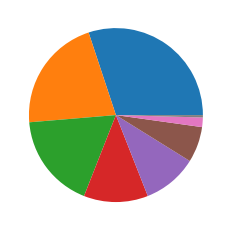

In [27]:
#3

#Solution de base
plt.pie(df["matgras"].value_counts())


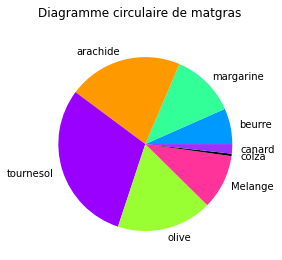

In [29]:

#Solution améliorée
fig1, ax1 = plt.subplots()
col=["#0099FF", "#33FF99","#FF9900", "#9900FF", "#99FF33","#FF3399","#000000", "#9933FF"]
ax1.pie(df["matgras"].value_counts(sort=False), labels=df['matgras'].cat.categories,colors=col)
fig1.suptitle('Diagramme circulaire de matgras')
plt.show(ax1)

<AxesSubplot:xlabel='viande'>

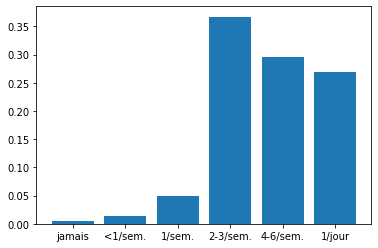

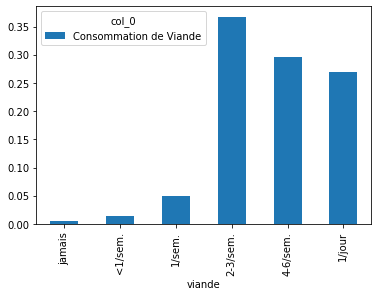

In [31]:

#4 


#Solution de base

tV=df["viande"].value_counts(sort=False)/226
plt.bar(tV.index,tV)

#solution améliorée
tableViande=pan.crosstab(index=df["viande"],columns="Consommation de Viande",normalize=True)
tableViande.plot.bar()


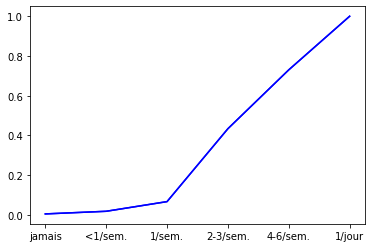

In [32]:

#5
plt.plot(tableViande.index,np.cumsum(tableViande),color='b')

#Alternative:
plt.plot(tableViande.index,tableViande.cumsum(),color='b')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


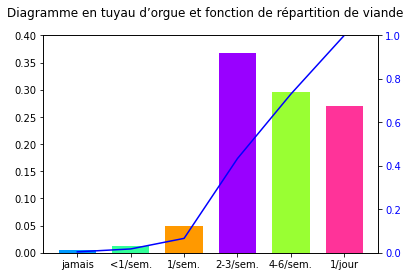

In [33]:


#6
tableViande=pan.crosstab(index = df["viande"],columns ="freq",normalize=True)
l=len(tableViande);x = np.arange(l);w=0.7
fig, ax = plt.subplots();ax.set_ylim(0,0.4)
ax.bar(x,np.reshape(tableViande.values,l), width=w,
color=col)
ax2=ax.twinx()
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylim(0,1)
ax2.plot(x,tableViande.cumsum(),color='b')
fig.suptitle("Diagramme en tuyau d’orgue et fonction de répartition de viande")
ax.set_xticks(x)
ax.set_xticklabels(tableViande.index)
ax.legend(frameon=False)

<AxesSubplot:xlabel='cafe'>

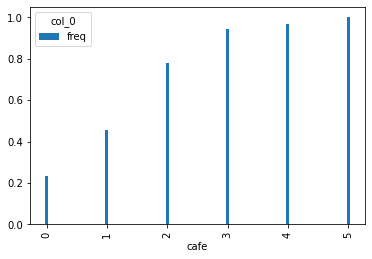

In [34]:

###################Exercice 3#########################
#1
tableCafe=pan.crosstab(index=df["cafe"],columns="freq",normalize=True).cumsum()


tableCafe.plot.bar(width=0.05)


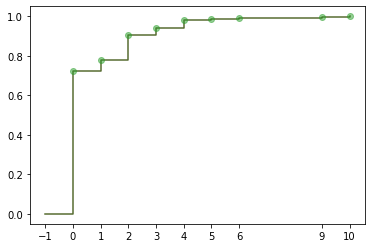

In [35]:

#2
tableThe=pan.crosstab(index = df["the"],columns="freq",normalize=True).cumsum()

xThe = np.array([-1,*(tableThe.index)])#abcisses aux valeurs et -1
val=np.reshape(tableThe.values,len(tableThe))#valeurs des fréquences cumulées

figThe, axThe = plt.subplots();
axThe.step(xThe,np.array([0,*val]), where='post', color="#556b2f")#trace le diagramme en escalier en ajoutant un point de départ à valeur 0 
#facultatif :
axThe.plot(tableThe.index, val, 'C2o', alpha=0.5)#trace les points de sauts
axThe.set_xticks(xThe)#les valeurs des sauts en abscisse


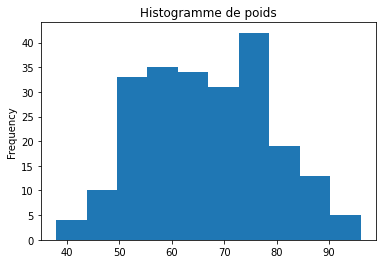

In [36]:

#3

plotPoids=df["poids"].plot.hist(title='Histogramme de poids')
plt.show(plotPoids)


74.47787610619469

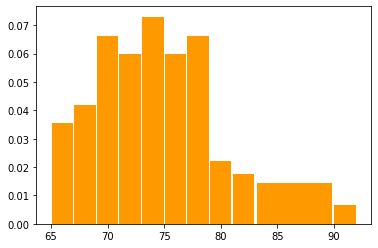

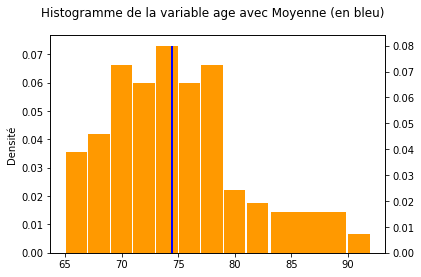

In [37]:

#4
figAge, axAge = plt.subplots()
axAge.hist(df["age"],[*(65+np.arange(10)*2),90,92], color=col[2],rwidth=0.95,density=True)

###################### Supplément: on peut aussi illustrer l'ajout d'une barre au niveau de la moyenne
figAge, axAge = plt.subplots()
axAge.hist(df["age"],[*(65+np.arange(10)*2),90,92], color=col[2],rwidth=0.95,density=True)
ax2=axAge.twinx()
ax2.bar(np.mean(df["age"]),0.08,color='blue',width=.2)
axAge.set_ylabel('Densité')
figAge.suptitle("Histogramme de la variable age avec Moyenne (en bleu)")
np.mean(df["age"])


Text(0.5, 0.98, "Nuage de Points de la taille en fonction de l'âge")

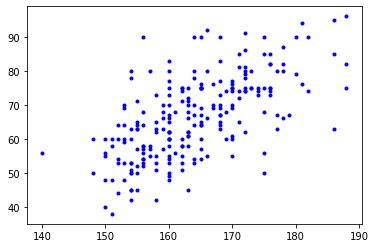

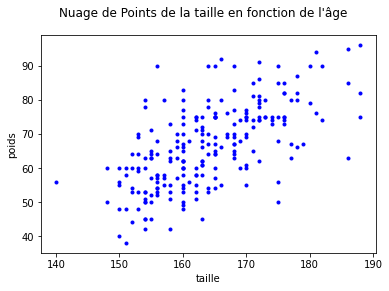

In [38]:

#5
plt.plot(df["taille"],df["poids"],'b.')

#solution avec ajout
fig, ax = plt.subplots()
ax.plot(df["taille"],df["poids"],'b.')
ax.set_ylabel("poids")
ax.set_xlabel("taille")
fig.suptitle("Nuage de Points de la taille en fonction de l'âge")



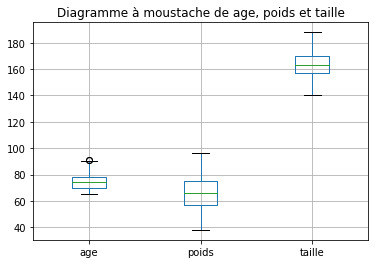

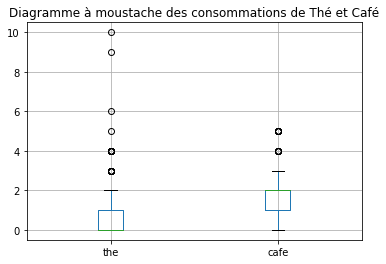

In [39]:

#6
box=df.boxplot(column=['age','poids','taille'])
box.set_title('Diagramme à moustache de age, poids et taille')
plt.show(box)



box2=df.boxplot(column=['the','cafe'])
box2.set_title('Diagramme à moustache des consommations de Thé et Café')
plt.show(box2)
#La consommation de thé a beaucoup de valeurs extrêmes, une écrasante majorité ne consomme jamais de thé et la presque totalité au plus 1 ou 2, d'où une très forte assymétrie de la Moustache
#La consommation de Cafe est beaucoup typique et similaire à celle des variables continues avec peu de valeurs extrêmes.
#En tout cas, le diagramme à moustache suffit à montrer que les deux consommations sont qualitativement très différentes.



In [40]:
###################Exercice 4#########################


#1

x=np.array([1,8,5,1])



array([1, 3, 5, 7, 9])

In [41]:

#2
y=np.concatenate(([0],1+2*np.array(range(5))))
y=np.concatenate(([0],[i for i in range(10) if i%2==1]))
y=np.concatenate(([0],range(1,10,2))) 


In [43]:

#3
print(y[2])
print(y[2:4])
print(y[-2])#7
print(y[y<=5])



3
[3 5]
7
[0 1 3 5]


In [44]:

#5
y[y>0]#on triche vu que les valeurs y>0 correspondent à x>0
y[1:]


array([1, 3, 5, 7, 9])

In [47]:

#6
X=np.repeat(x.reshape(1,4),25,axis=0).reshape(100)

np.reshape(np.repeat(x.reshape(1,4),25,axis=0),100)

 


array([1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8,
       5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1,
       1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8,
       5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1,
       1, 8, 5, 1, 1, 8, 5, 1, 1, 8, 5, 1])

In [48]:
#Attention: Les commandes suivantes ne donnent PAS ce qu'on demande:
np.repeat(x,25)#1er essai:mauvais sens


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])